## Reading jsons

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (7,6)
#plt.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json
from pathlib import Path


## Read file names
#path_to_json = '.'

path_to_json = Path(os.getcwd()).glob("**/*.json")
list_files = [str(path) for path in path_to_json]


times_files = [pos_json for pos_json in list_files if pos_json.endswith('_time.json')]
compact_time_files = [pos_json for pos_json in list_files if pos_json.endswith('_time_compact.json')]
mem_files = [pos_json for pos_json in list_files if pos_json.endswith('_mem.json')]
triangulation_files = [pos_json for pos_json in list_files if pos_json.endswith('_triangulation_info.json')]



# Read json of no compact files
data_to_append = []
for files in times_files:
    data_to_append.append(pd.read_json(files, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time = pd.concat(data_to_append, axis=1)
data_time = data_time.transpose()


## Read json of compact files
compact_data_to_append = []
for js in compact_time_files:
    compact_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time_compact = pd.concat(compact_data_to_append, axis=1)
data_time_compact = data_time_compact.transpose()

## Read json of memory files
mem_data_to_append = []
for js in mem_files:
    mem_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_mem = pd.concat(mem_data_to_append, axis=1)
data_mem = data_mem.transpose()

## Read json of triangulation files
triangulation_data_to_append = []
for js in triangulation_files:
    triangulation_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_triangulation = pd.concat(triangulation_data_to_append, axis=1)
data_triangulation = data_triangulation.transpose()

#Sort dataframe by n_vertices
data_time = data_time.sort_values(by=['n_vertices'])
data_time_compact = data_time_compact.sort_values(by=['n_vertices'])
data_mem = data_mem.sort_values(by=['num_vertices'])
data_triangulation = data_triangulation.sort_values(by=['n_points'])

# Remove last rows of dataframe
#data_time = data_time.iloc[:15]
#data_time_compact = data_time_compact.iloc[:15]
#data_mem = data_mem.iloc[:15]
#data_triangulation = data_triangulation.iloc[:15]

## Average of tests
data_time = data_time.groupby(['n_vertices'], as_index=False).mean()
data_time_compact = data_time_compact.groupby(['n_vertices'], as_index=False).mean()
data_mem = data_mem.groupby(['num_vertices'], as_index=False).mean()
data_triangulation = data_triangulation.groupby(['n_points'], as_index=False).mean()



## Copy tables
data_time_table = data_time.copy(deep = True)
data_time_compact_table = data_time_compact.copy(deep = True)
data_mem_table = data_mem.copy(deep = True)
data_triangulation_table = data_triangulation.copy(deep = True)

#Geometric data as integer
data_time['n_vertices'] = data_time['n_vertices'].astype(int)
data_time['n_half_edges'] = data_time['n_half_edges'].astype(int)
data_time['n_faces'] = data_time['n_faces'].astype(int)
data_time['n_barrier_edge_tips'] = data_time['n_barrier_edge_tips'].astype(int)

data_time_compact['n_vertices'] = data_time_compact['n_vertices'].astype(int)
data_time_compact['n_half_edges'] = data_time_compact['n_half_edges'].astype(int)
data_time_compact['n_faces'] = data_time_compact['n_faces'].astype(int)
data_time_compact['n_barrier_edge_tips'] = data_time_compact['n_barrier_edge_tips'].astype(int)


## Convert byte to gb
data_mem['mem_triangulation'] = data_mem['mem_triangulation']/1000000000
data_mem['mem_polylla'] = data_mem['mem_polylla']/1000000000
data_mem['mem_compact_triangulation'] = data_mem['mem_compact_triangulation']/1000000000
data_mem['mem_compact_polylla'] = data_mem['mem_compact_polylla']/1000000000
data_mem['mem_gen_triangulation'] = data_mem['mem_gen_triangulation']/1000000000
data_mem['mem_gen_polylla'] = data_mem['mem_gen_polylla']/1000000000
data_mem['mem_gen_compact_triangulation'] = data_mem['mem_gen_compact_triangulation']/1000000000
data_mem['mem_gen_compact_polylla'] = data_mem['mem_gen_compact_polylla']/1000000000
data_mem['mem_pemb'] = data_mem['mem_pemb']/1000000000
data_mem['mem_nodes'] = data_mem['mem_nodes']/1000000000



## Convert ms to minutes
data_time['time_to_generate_polygonal_mesh'] = data_time['time_to_generate_polygonal_mesh']/60000
data_time['time_triangulation_generation'] = data_time['time_triangulation_generation']/60000
data_time['time_to_label_max_edges'] = data_time['time_to_label_max_edges']/60000
data_time['time_to_label_frontier_edges'] = data_time['time_to_label_frontier_edges']/60000
data_time['time_to_label_seed_edges'] = data_time['time_to_label_seed_edges']/60000
data_time['time_to_label_total'] = data_time['time_to_label_total']/60000
data_time['time_to_traversal_and_repair'] = data_time['time_to_traversal_and_repair']/60000
data_time['time_to_traversal'] = data_time['time_to_traversal']/60000
data_time['time_to_repair'] = data_time['time_to_repair']/60000

data_time_compact['time_to_generate_polygonal_mesh'] = data_time_compact['time_to_generate_polygonal_mesh']/60000
data_time_compact['time_triangulation_generation'] = data_time_compact['time_triangulation_generation']/60000
data_time_compact['time_to_label_max_edges'] = data_time_compact['time_to_label_max_edges']/60000
data_time_compact['time_to_label_frontier_edges'] = data_time_compact['time_to_label_frontier_edges']/60000
data_time_compact['time_to_label_seed_edges'] = data_time_compact['time_to_label_seed_edges']/60000
data_time_compact['time_to_label_total'] = data_time_compact['time_to_label_total']/60000
data_time_compact['time_to_traversal_and_repair'] = data_time_compact['time_to_traversal_and_repair']/60000
data_time_compact['time_to_traversal'] = data_time_compact['time_to_traversal']/60000
data_time_compact['time_to_repair'] = data_time_compact['time_to_repair']/60000

data_triangulation['triangulation_time'] = data_triangulation['triangulation_time']/60000
data_triangulation['memory_usage'] = data_triangulation['memory_usage']/1000000000
data_triangulation['memory_peak'] = data_triangulation['memory_peak']/1000000000



# Time generation data structure and mesh

Text(0, 0.5, 'Time in minutes')

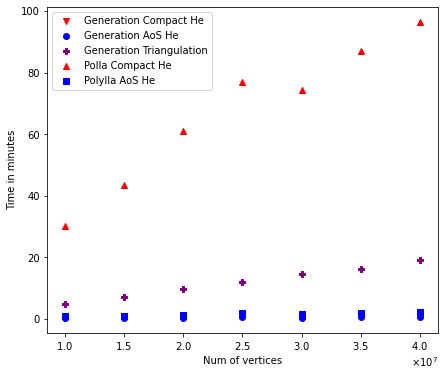

In [63]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="v", label='Generation Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="o",  label='Generation AoS He')
plt.scatter(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Generation Triangulation')

#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="red",marker="^", label='Polla Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="blue" ,marker="s",  label='Polylla AoS He')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")

In [64]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
'''
q = """SELECT data_time_table.n_vertices as "#Vertices", data_time_table.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_table.time_triangulation_generation as "Triangulation AoS", data_time_compact_table.time_to_generate_polygonal_mesh as "Polylla Compact", data_time_compact_table.time_triangulation_generation as "Triangulation Compact"
    FROM data_time_table, data_time_compact_table
    WHERE data_time_table.n_vertices = data_time_compact_table.n_vertices
    ORDER BY data_time_table.n_vertices
    LIMIT 10;"""
'''

q = """SELECT data_time.n_vertices as "#Vertices", data_triangulation.triangulation_time as "Delaunay Triangulation", data_time.time_triangulation_generation as "Triangulation AoS", data_time_compact.time_triangulation_generation as "Triangulation Compact", data_time.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_compact.time_to_generate_polygonal_mesh as "Polylla Compact"
    FROM data_time, data_time_compact, data_triangulation
    WHERE data_time.n_vertices = data_time_compact.n_vertices and data_time.n_vertices = data_triangulation.n_points
    ORDER BY data_time.n_vertices Desc
    LIMIT 10"""

pysqldf(q).round(2)

,#Vertices,Delaunay Triangulation,Triangulation AoS,Triangulation Compact,Polylla AoS,Polylla Compact
0,40000000,19.17,0.55,1.03,2.31,96.57
1,35000000,16.08,0.47,0.94,2.02,87.11
2,30000000,14.70,0.40,0.80,1.71,74.52
3,25000000,11.92,0.49,0.91,2.00,77.00
4,20000000,9.58,0.27,0.75,1.13,61.14
5,15000000,7.19,0.24,0.45,1.00,43.62
6,10000000,4.67,0.19,0.34,0.75,30.06


# Time by label phases

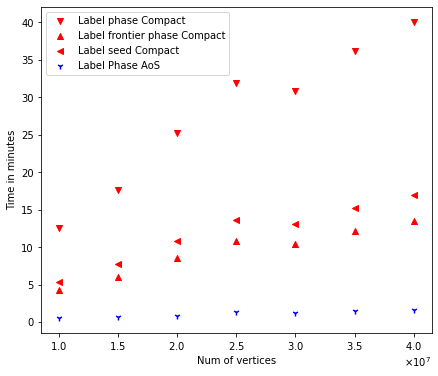

In [65]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Label frontier phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="<", label='Label seed Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="2",  label='Label frontier phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="3",  label='Label seed AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_label_phases.pdf', bbox_inches='tight', dpi=300)

# Time by polylla phases

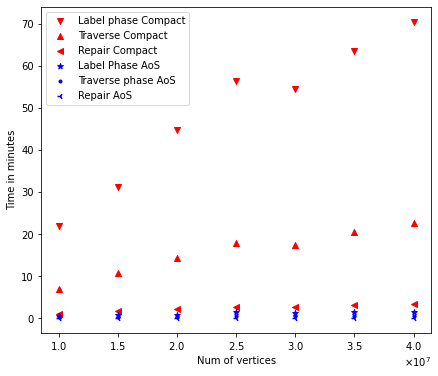

In [66]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'comp_time_polylla_phases.pdf', bbox_inches='tight', dpi=300)


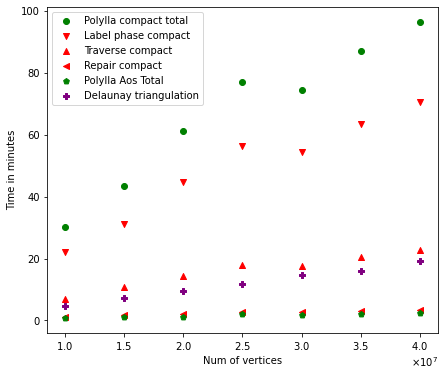

In [67]:
#data_time = data_time.iloc[:-1 , :]

plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="green",marker="o", label='Polylla compact total')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair compact')
plt.scatter(data_time_compact.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_triangulation.n_points, data_triangulation.triangulation_time, c="purple",marker="P", label='Delaunay triangulation')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_compact_polylla_phases.pdf', bbox_inches='tight', dpi=300)

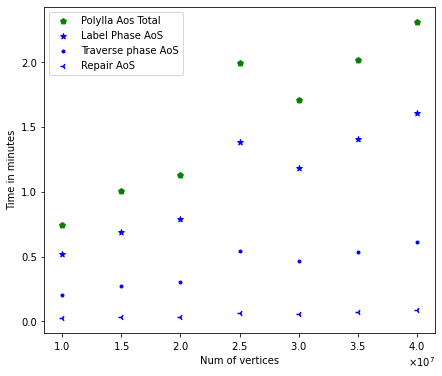

In [68]:

plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_polylla_AoS_phases.pdf', bbox_inches='tight', dpi=300)

# Memory comp general

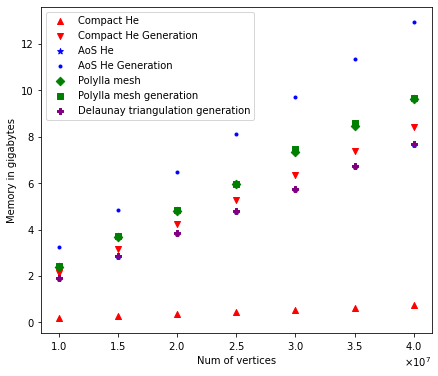

In [69]:

plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="v", label='Compact He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="*",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker=".",  label='AoS He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_polylla, c="green" ,marker="D",  label='Polylla mesh ')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_polylla, c="green" ,marker="s",  label='Polylla mesh generation')
plt.scatter(data_triangulation.n_points, data_triangulation.memory_peak, c="purple",marker="P", label='Delaunay triangulation generation')

plt.legend()
# https://stackoverflow.com/questions/25750170/show-decimal-places-and-scientific-notation-on-the-axis-of-a-matplotlib-plot
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Memory in gigabytes")
plt.savefig(r'comp_memory_all.pdf', bbox_inches='tight', dpi=300)



In [70]:
q = """SELECT data_mem.num_vertices as "#Vertices",  mem_compact_triangulation as "Triangulation compact", mem_gen_compact_triangulation as "Triangulation Compact Generation", mem_triangulation as "Triangulation AoS", mem_gen_triangulation as "Triangulation generation", mem_polylla as "Polylla mesh", mem_gen_polylla as "Polylla generation", memory_peak as "Delaunay Triangulation" 
FROM data_mem, data_triangulation
where data_mem.num_vertices = data_triangulation.n_points
ORDER BY num_vertices DESC
LIMIT 10"""

pysqldf(q)

,#Vertices,Triangulation compact,Triangulation Compact Generation,Triangulation AoS,Triangulation generation,Polylla mesh,Polylla generation,Delaunay Triangulation
0,40000000,0.728802,8.439615,7.679107,12.958276,9.611864,9.669131,7.681347
1,35000000,0.637752,7.385144,6.719167,11.338393,8.469027,8.577820,6.722436
2,30000000,0.546512,6.330316,5.759231,9.718516,7.326196,7.486493,5.763588
3,25000000,0.455464,5.272411,4.799296,8.098642,5.948494,5.948494,4.802043
4,20000000,0.364411,4.219628,3.839370,6.478784,4.805701,4.834378,3.841381
5,15000000,0.273271,3.164804,2.879450,4.858939,3.662892,3.743016,2.882202
6,10000000,0.182223,2.109693,1.919558,3.239146,2.402678,2.417027,1.920918


# Preguntas a responder

## Time questions
1. Percentage time diff polylla compact generation and polylla AoS generation
2. Percentage time diff triangulation generation vs compact triangulation vs Delaunay trianglation



## Memory questions
1. Percentage memory diff polylla compact generation and polylla AoS generation 
2. Percentage memory diff triangulation generation vs compact triangulation and Delunay triangulatiuon
3. Percetange memory diff compact triangulation vs AoS triangulation 
4. Memory uses by pemb and by nodes in the compact polylla output

In [71]:

q = """SELECT data_time.n_vertices as "#Vertices", data_triangulation.triangulation_time as "Delaunay Triangulation", data_time.time_triangulation_generation as "Triangulation AoS", data_time_compact.time_triangulation_generation as "Triangulation Compact", data_time.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_compact.time_to_generate_polygonal_mesh as "Polylla Compact", 

/* Percentage time diff polylla compact generation and polylla AoS generation */
(data_time.time_to_generate_polygonal_mesh/data_time_compact.time_to_generate_polygonal_mesh) as "PAOS/PolyCompact",
(data_time.time_triangulation_generation/data_time_compact.time_triangulation_generation) as "TAOS/Pemb",

/* Challa*/
(data_time.time_to_generate_polygonal_mesh/data_triangulation.triangulation_time) as "PAOS/Delaunay",
(data_time_compact.time_to_generate_polygonal_mesh/data_triangulation.triangulation_time) as "PolyCompact/Delaunay",
(data_triangulation.triangulation_time/data_time_compact.time_to_generate_polygonal_mesh) as "Delaunay/PolyCompact",
(data_triangulation.triangulation_time/data_time.time_to_generate_polygonal_mesh) as "Delaunay/PAOS",

/* Percentage time diff triangulation generation vs compact triangulation vs Delaunay trianglation*/
(data_time_compact.time_to_generate_polygonal_mesh/data_time.time_to_generate_polygonal_mesh) as "PolyCompact/PAOS",
(data_time_compact.time_triangulation_generation/data_time.time_triangulation_generation) as "TCompact/TAOS",
(data_time_compact.time_triangulation_generation/data_triangulation.triangulation_time) as "TCompact/DT"

    FROM data_time, data_time_compact, data_triangulation
    WHERE data_time.n_vertices = data_time_compact.n_vertices and data_time.n_vertices = data_triangulation.n_points
    ORDER BY data_time.n_vertices Desc
    LIMIT 10"""

time_results = pysqldf(q)

print("Compact polylla generation takes {} times more than AoS polylla generation".format(time_results["PolyCompact/PAOS"].mean().round(2)))
print("Compact triangulation generation takes {} times more than AoS triangulation generation".format(time_results["TCompact/TAOS"].mean().round(2)))
print("Polylla compact takes {} times more than Delaunay".format(time_results["PolyCompact/Delaunay"].mean().round(2)))
print("Delaunay takes {} times less more than Polylla".format(time_results["Delaunay/PAOS"].mean().round(2)))

#time_results.mean().round(2)

Compact polylla generation takes 43.55 times more than AoS polylla generation
Compact triangulation generation takes 2.04 times more than AoS triangulation generation
Polylla compact takes 5.84 times more than Delaunay
Delaunay takes 7.53 times less more than Polylla


In [78]:
#q = """SELECT data_mem.num_vertices as "#Vertices",  mem_compact_triangulation as "Triangulation compact", mem_gen_compact_triangulation as "Triangulation Compact Generation", mem_triangulation as "Triangulation AoS", mem_gen_triangulation as "Triangulation generation", mem_polylla as "Polylla mesh", mem_gen_polylla as "Polylla generation", memory_peak as "Delaunay Triangulation",
#
#/*1. Percentage memory diff polylla compact generation and polylla AoS generation */
#
#data_mem.mem_gen_polylla/data_mem.mem_gen_compact_triangulation as "GEN_PolyCompact/GEN_PolyAoS",
#data_mem.mem_gen_compact_triangulation/data_mem.mem_gen_polylla as "GEN_PolyAoS/GEN_PolyCompact"
#
#/* 2. Percentage memory diff triangulation generation vs compact triangulation and Delunay triangulatiuon */
#
#
#FROM data_mem, data_triangulation
#where data_mem.num_vertices = data_triangulation.n_points
#ORDER BY num_vertices DESC
#LIMIT 10"""
#
#mem_results = pysqldf(q)

#q = """SELECT *
#FROM data_mem, data_triangulation
#where data_mem.num_vertices = data_triangulation.n_points
#ORDER BY num_vertices DESC
#LIMIT 10"""
#
#mem_results = pysqldf(q)
#mem_results

mem_results = pd.merge(data_mem, data_triangulation, how = "outer", left_on='num_vertices', right_on='n_points')
mem_results

,num_vertices,num_triangles,num_halfedges,mem_initial,mem_triangulation,mem_polylla,mem_compact_triangulation,mem_compact_polylla,mem_gen_triangulation,mem_gen_polylla,mem_gen_compact_triangulation,mem_gen_compact_polylla,mem_pemb,mem_nodes,n_points,triangulation_time,memory_usage,memory_peak
0,10000000,19992081.0,59984160.0,1305.0,1.919558,2.402678,0.182223,0.665380,3.239146,2.417027,2.109693,0.679129,0.020664,0.16,10000000,4.672006,2.080918,1.920918
1,15000000,29990159.0,89980316.0,1305.0,2.879450,3.662892,0.273271,1.056756,4.858939,3.743016,3.164804,1.136555,0.030933,0.24,15000000,7.191533,3.122202,2.882202
2,20000000,39988722.0,119977442.0,1305.0,3.839370,4.805701,0.364411,1.330789,6.478784,4.834378,4.219628,1.358167,0.041295,0.32,20000000,9.581294,4.161381,3.841381
3,25000000,49987407.0,149974812.0,1305.0,4.799296,5.948494,0.455464,1.604734,8.098642,5.948494,5.272411,1.604734,0.051569,0.40,25000000,11.920306,5.202043,4.802043
4,30000000,59986247.0,179972492.0,1305.0,5.759231,7.326196,0.546512,2.113549,9.718516,7.486493,6.330316,2.273322,0.061838,0.48,30000000,14.698822,6.243588,5.763588
5,35000000,69985104.0,209970206.0,1305.0,6.719167,8.469027,0.637752,2.387815,11.338393,8.577820,7.385144,2.495278,0.072300,0.56,35000000,16.077311,7.282436,6.722436
6,40000000,79984026.0,239968050.0,1305.0,7.679107,9.611864,0.728802,2.661642,12.958276,9.669131,8.439615,2.716367,0.082572,0.64,40000000,19.172033,8.321347,7.681347
